# Pre Processing

In [1]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving Coorti 2016-2018 estrazione 2020 02 21 per AI.xlsx to Coorti 2016-2018 estrazione 2020 02 21 per AI.xlsx
User uploaded file "Coorti 2016-2018 estrazione 2020 02 21 per AI.xlsx" with length 6481955 bytes


In [2]:
import pandas as pd
import numpy as np

#Read dataset
features =  pd.read_excel("Coorti 2016-2018 estrazione 2020 02 21 per AI.xlsx")

Rimpiazziamo i codici relativi a determinate feature con i nomi delle feature, così da poter utilizzare la funzione get_dummies() ed ottenere un one-hot-encoding

In [3]:
features["Diploma_scuola_superiore"] = features["Diploma_scuola_superiore"].map({1: "Classico", 2: "Scientifico", 3: "Linguistico", 4: "Magistrale", 5: "Artistico", 6: "Tecnico", 7: "Professionale", 8: "Altro_italiano", 9: "Estero", 99: "Non_disponibile"})
features["area_geografica_scuolasuperiore"] = features["area_geografica_scuolasuperiore"].map({1: "Emilia_romagna", 2: "Nord", 3: "Centro", 4: "Sud_isole", 5: "Estero", 99: "Non_disponibile"})
features["area_geografica_residenza"] = features["area_geografica_residenza"].map({1: "Emilia_romagna", 2: "Nord", 3: "Centro", 4: "Sud_isole", 5: "Estero", 99: "Non_disponibile"})
features["Ambito"] = features["Ambito"].map({1: "Economia", 2: "Farmacia", 3: "Giurisprudenza", 4: "Ingegneria", 5: "Lingue", 6: "Medicina", 7: "Veterinaria", 8: "Psicologia", 9: "Scienze", 10: "Scienze_agroalimanetari", 11: "Scienze_educazione_formazione", 12: "Scienze_motorie", 13: "Scienze_politiche", 14: "Scienze_statistiche", 15: "Sociologia", 16: "Studi_umanistici"})
features = pd.get_dummies(features)

Abbiamo sostituito i valori NaN della feature "voto_scuola_superiore" con la media. Inoltre sono state droppate le colonne non utili ai fini dell'addestramento, ed infine eliminate le tuple contente almeno un NaN

In [4]:
from datetime import datetime, date

def getAge(dataNascita, coorte):
    ts = pd.to_datetime(str(dataNascita)) 
    born = ts.strftime('%d/%m/%Y')
    born = datetime.strptime(born, "%d/%m/%Y").date()
    date = "31/12/"+str(coorte)
    dataAttuale = datetime.strptime(date, "%d/%m/%Y").date()
    age = dataAttuale.year - born.year - ((dataAttuale.month, dataAttuale.day) < (born.month, born.day))
    return age

#add new column with NaN
features["Eta"] = np.nan

for ind in features.index:
    studente = features.loc[ind]
    dataNascita = studente["DataNascita"]
    coorte = studente["Coorte"]
    #fill the new column with age 
    features.at[ind,'Eta'] = getAge(dataNascita, coorte)


In [5]:
mean_value = features['voto_scuola_superiore'].mean()
features['voto_scuola_superiore'] = features['voto_scuola_superiore'].fillna(mean_value)
features= features.drop('ID_Studente', axis = 1)
features= features.drop('Classe_ISEE', axis = 1)
features= features.drop('DataNascita', axis = 1)
features = features.drop('Coorte',axis=1)
features=features.drop('OFA_superati',axis=1)
features = features.dropna()

# Algorithm

Split the training testing set with a 20 % size and print the dimension of the data splitted
Split arrays or matrices into random train and test subsets.

In [6]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error,r2_score
from sklearn import metrics
#Dividing the data into attributes and labels
X = features.drop('Abbandoni', axis=1) 
y = features['Abbandoni']
#Dividing data into training and test sets

X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.2,random_state = 42)
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((19424, 59), (4857, 59), (19424,), (4857,))

Build a model and fit it with training test

In [7]:
model = linear_model.LogisticRegression()
model.fit(X_train,Y_train)

LogisticRegression()

Predict a value in Y_pred using model defined previously

In [8]:
Y_pred = model.predict(X_test)

#Evaluating

In [9]:
print('Coefficients: ',model.coef_)
print('Intercept: ',model.intercept_)
print('Mean Squared Error :%.2f' % mean_squared_error(Y_test,Y_pred))
print('Coefficient of determination (R ^2): %.2f' % r2_score(Y_test,Y_pred))

Coefficients:  [[-4.41836055e-04 -2.48457840e-02 -1.20545597e-05  8.00858343e-05
   4.94124121e-06 -3.45861636e-04 -1.61127681e-05 -9.26913028e-06
   6.17159949e-07  9.02456232e-07 -3.23068883e-05 -1.94670933e-05
  -4.30779905e-05  4.17904075e-06 -1.23730707e-04  2.00052169e-05
  -9.92666903e-05  2.16895316e-05 -2.27554399e-05 -1.43355483e-05
  -1.96318231e-05 -1.23856816e-04 -1.71500999e-05 -7.27262367e-05
  -4.10087050e-05 -3.14350210e-05 -2.78495616e-05  0.00000000e+00
  -2.70663148e-05 -1.43096361e-04  4.97659645e-06 -2.82029902e-04
   6.59734173e-06 -5.16742005e-05  1.00997552e-06  4.03008725e-05
  -1.20835453e-04 -6.82469835e-05 -1.02244690e-06 -2.24599375e-05
   5.60340694e-05  1.18386304e-06 -6.36058671e-06 -5.23037037e-06
  -1.95485311e-05 -3.63461542e-06 -6.27852155e-06 -6.29019853e-05
  -7.91111897e-07 -2.13165307e-04 -2.96737401e-05  1.66814713e-06
   1.61466638e-06 -4.03097144e-05  2.30445159e-06 -2.45925903e-06
   9.88381803e-06 -3.19025866e-07 -5.72021251e-03]]
Intercept

Evaluating the algorithm

In [10]:
print("Evaluating the Algorithm:\n")
cf_matrix = metrics.confusion_matrix(Y_test,Y_pred)
print(cf_matrix)
print(metrics.classification_report(Y_test,Y_pred))


print("true negative",cf_matrix[0,0])
print("false negative",cf_matrix[1,0])
print("true positive",cf_matrix[1,1])
print("false positive",cf_matrix[0,1])

print("\nEvaluating Prediction Accuracy:\n")
print("Accuracy:", metrics.accuracy_score(Y_test, Y_pred))

Evaluating the Algorithm:

[[4426    0]
 [ 431    0]]
              precision    recall  f1-score   support

           0       0.91      1.00      0.95      4426
           1       0.00      0.00      0.00       431

    accuracy                           0.91      4857
   macro avg       0.46      0.50      0.48      4857
weighted avg       0.83      0.91      0.87      4857

true negative 4426
false negative 431
true positive 0
false positive 0

Evaluating Prediction Accuracy:

Accuracy: 0.9112620959439983


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


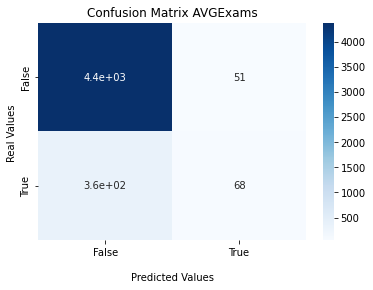

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Confusion Matrix AVGExams');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Real Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()